# Projeto PAMAP2

O objetivo do projeto é desenvolver modelos que permitam classificar quanto à atividade dados com a mesma estrutura aos obtidos no dataset de referência ( [PAMAP2](https://archive.ics.uci.edu/ml/datasets/pamap2+physical+activity+monitoring) ). Apenas serão consideradas as atividades 1, 2, 3, 4, 7 e 17 (as 6 mais comuns). Estas correspondem, respetivamente, a 'Lying', 'Sitting', 'Standing', 'Walking', 'Nordic Walking' e 'Ironing'.

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import math
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [4]:
dataCol = pd.read_csv('data_df.csv')
dataCol.shape

(1942872, 43)

In [3]:
#Para experimentar o codigo: sample de 100k. Correr com os dados todos no pc
dataCol= dataCol.sample(n= 20000, random_state= 1)

In [5]:
train_val_df= dataCol.sample(frac= 0.8, random_state= 1)
test_df= dataCol.drop(train_val_df.index)

train_val_df.shape[0]+test_df.shape[0]== dataCol.shape[0] #check if the split has lost any rows. If true no rows were lost. If False some rows were lost in the split

True

In [15]:
train_val_df.to_csv('train_val_df.csv', index=False)
test_df.to_csv('test_df.csv', index=False)

In [4]:
train_val_df= pd.read_csv('train_val_df.csv')
test_df= pd.read_csv('test_df.csv')

Filtrar as dfs pelas categorias a estudar

In [6]:
train_val_df= train_val_df.loc[train_val_df['activityID'].isin([1, 2, 3, 4, 7, 17])]
test_df= test_df.loc[test_df['activityID'].isin([1, 2, 3, 4, 7, 17])]
train_val_df.shape, test_df.shape

((986976, 43), (246224, 43))

In [7]:
features_tv_df= train_val_df.drop(['activityID', 'timestamp', 'subject_id'], axis= 1, inplace=False)

features_ts_df= test_df.drop(['activityID', 'timestamp', 'subject_id'], axis= 1, inplace=False)
true_labels_ts= test_df['activityID']
features_tv_df.shape, features_ts_df.shape, true_labels_ts.shape

((986976, 40), (246224, 40), (246224,))

Para utilizar a loss function 'Categorical Crossentropy' é necessário que as target labels sejam dadas no formato one-hot

In [8]:
from sklearn.preprocessing import LabelBinarizer

targets_onehot_tv = LabelBinarizer().fit_transform(train_val_df.activityID)
#targets_onehot_ts = LabelBinarizer().fit_transform(test_df.activityID)
targets_onehot_tv.shape #targets_onehot_ts.shape

(986976, 6)

Dividir o Train/Validation dataset

In [9]:
x_train, x_val, y_train, y_val = train_test_split(features_tv_df, targets_onehot_tv, test_size=0.2, random_state=1)
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((789580, 40), (197396, 40), (789580, 6), (197396, 6))

Tabela com os modelos e scaling a usar. O modelo simples é um modelo com 1 dense layer com 64 e o grande tem 3 dense layers com 256 units

| **Scaler/Modelo** 	| **Simples** 	| **Grande** 	|
|-------------------	|-------------	|------------	|
| **Nada**          	| NS          	| NG         	|
| **MinMax**        	| MS          	| MG         	|

Aplicar Min Max Scaling aos dados

In [10]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

#apply scaling to all columns except subject and activity
scalerM = MinMaxScaler()
x_train_s = x_train.copy()
x_val_s = x_val.copy()
x_test_s= features_ts_df.copy()

x_train_s = scalerM.fit_transform(x_train_s)
x_val_s = scalerM.transform(x_val_s)
x_test_s= scalerM.transform(x_test_s)

pd.DataFrame(x_train_s).describe()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
count,789580.000000,789580.000000,789580.000000,789580.000000,789580.000000,789580.000000,789580.000000,789580.000000,789580.000000,789580.000000,...,789580.000000,789580.000000,789580.000000,789580.000000,789580.000000,789580.000000,789580.000000,789580.000000,789580.000000,789580.000000
mean,0.376972,0.623350,0.499918,0.415145,0.229169,0.634500,0.526955,0.356845,0.515881,0.453888,...,0.482425,0.281605,0.492176,0.523017,0.469674,0.337253,0.522413,0.666846,0.614124,0.515443
std,0.191624,0.220998,0.042981,0.020941,0.024135,0.068370,0.042375,0.036740,0.028739,0.038798,...,0.017300,0.074079,0.051726,0.031021,0.047456,0.049796,0.110774,0.083642,0.087630,0.090585
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.224547,0.467890,0.465309,0.406835,0.211945,0.580026,0.509420,0.330499,0.510344,0.446565,...,0.476015,0.278443,0.478788,0.510944,0.465869,0.336831,0.515348,0.619649,0.564303,0.455778
50%,0.331939,0.642202,0.498521,0.415848,0.227367,0.632307,0.528755,0.354525,0.515957,0.453351,...,0.483428,0.290128,0.494917,0.524993,0.469809,0.340975,0.522208,0.657770,0.609592,0.525605
75%,0.536960,0.788991,0.530227,0.427070,0.248431,0.683135,0.552021,0.386747,0.520704,0.461413,...,0.490625,0.294141,0.507136,0.538575,0.472111,0.345144,0.524109,0.733601,0.679609,0.587956
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
n_features = features_tv_df.shape[1]
n_classes = targets_onehot_tv.shape[1]
n_features, n_classes

(40, 6)

In [32]:
pd.DataFrame(x_test_s).to_csv('scaled_test_features.csv', index= False)
true_labels_ts.to_csv('true_labels_ts.csv', index= False)
features_ts_df.to_csv('features_ts_df.csv', index= False)

In [12]:
from tensorflow import keras
tf.keras.backend.clear_session()

In [13]:
def compile_fit(model, x_train, y_train, x_val, y_val, epochs):
    model.compile(optimizer= 'adam',
                loss=tf.keras.losses.CategoricalCrossentropy(),
                metrics=['categorical_accuracy'])
    history = model.fit(x_train, y_train, batch_size= 256, epochs= epochs, validation_data= (x_val, y_val))

    return history

In [14]:
model_history= {}

In [15]:
NS = tf.keras.Sequential([
    tf.keras.Input(shape=(n_features,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(n_classes, activation='softmax')])
model_history['NS']= compile_fit(NS, x_train, y_train, x_val, y_val, 15)

Epoch 1/15
3085/3085 [==============================] - 16s 5ms/step - loss: 0.1811 - categorical_accuracy: 0.9522 - val_loss: 0.0690 - val_categorical_accuracy: 0.9780
Epoch 2/15
3085/3085 [==============================] - 17s 5ms/step - loss: 0.0571 - categorical_accuracy: 0.9816 - val_loss: 0.0486 - val_categorical_accuracy: 0.9841
Epoch 3/15
3085/3085 [==============================] - 17s 5ms/step - loss: 0.0421 - categorical_accuracy: 0.9861 - val_loss: 0.0318 - val_categorical_accuracy: 0.9890
Epoch 4/15
3085/3085 [==============================] - 17s 5ms/step - loss: 0.0343 - categorical_accuracy: 0.9885 - val_loss: 0.0281 - val_categorical_accuracy: 0.9901
Epoch 5/15
3085/3085 [==============================] - 17s 5ms/step - loss: 0.0287 - categorical_accuracy: 0.9902 - val_loss: 0.0253 - val_categorical_accuracy: 0.9913
Epoch 6/15
3085/3085 [==============================] - 18s 6ms/step - loss: 0.0259 - categorical_accuracy: 0.9912 - val_loss: 0.0222 - val_categorical_acc

In [16]:
NG= tf.keras.Sequential([
    tf.keras.Input(shape=(n_features,)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(n_classes, activation= 'softmax')
])
model_history['NG']= compile_fit(NG, x_train, y_train, x_val, y_val, 15)

Epoch 1/15
3085/3085 [==============================] - 23s 7ms/step - loss: 0.0668 - categorical_accuracy: 0.9778 - val_loss: 0.0320 - val_categorical_accuracy: 0.9887
Epoch 2/15
3085/3085 [==============================] - 22s 7ms/step - loss: 0.0289 - categorical_accuracy: 0.9900 - val_loss: 0.0218 - val_categorical_accuracy: 0.9925
Epoch 3/15
3085/3085 [==============================] - 22s 7ms/step - loss: 0.0232 - categorical_accuracy: 0.9920 - val_loss: 0.0180 - val_categorical_accuracy: 0.9932
Epoch 4/15
3085/3085 [==============================] - 22s 7ms/step - loss: 0.0178 - categorical_accuracy: 0.9938 - val_loss: 0.0165 - val_categorical_accuracy: 0.9941
Epoch 5/15
3085/3085 [==============================] - 22s 7ms/step - loss: 0.0158 - categorical_accuracy: 0.9944 - val_loss: 0.0118 - val_categorical_accuracy: 0.9960
Epoch 6/15
3085/3085 [==============================] - 22s 7ms/step - loss: 0.0140 - categorical_accuracy: 0.9951 - val_loss: 0.0124 - val_categorical_acc

In [18]:
MG = tf.keras.Sequential([
    tf.keras.Input(shape=(n_features,)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(n_classes, activation='softmax')])
model_history['MG']= compile_fit(MG, x_train_s, y_train, x_val_s, y_val, 15)

Epoch 1/15
3085/3085 [==============================] - 23s 7ms/step - loss: 0.1132 - categorical_accuracy: 0.9613 - val_loss: 0.1217 - val_categorical_accuracy: 0.9613
Epoch 2/15
3085/3085 [==============================] - 22s 7ms/step - loss: 0.0339 - categorical_accuracy: 0.9886 - val_loss: 0.0226 - val_categorical_accuracy: 0.9921
Epoch 3/15
3085/3085 [==============================] - 22s 7ms/step - loss: 0.0254 - categorical_accuracy: 0.9911 - val_loss: 0.0136 - val_categorical_accuracy: 0.9955
Epoch 4/15
3085/3085 [==============================] - 22s 7ms/step - loss: 0.0214 - categorical_accuracy: 0.9926 - val_loss: 0.0118 - val_categorical_accuracy: 0.9955
Epoch 5/15
3085/3085 [==============================] - 22s 7ms/step - loss: 0.0165 - categorical_accuracy: 0.9942 - val_loss: 0.0287 - val_categorical_accuracy: 0.9902
Epoch 6/15
3085/3085 [==============================] - 22s 7ms/step - loss: 0.0151 - categorical_accuracy: 0.9946 - val_loss: 0.0256 - val_categorical_acc

In [19]:
MS= tf.keras.Sequential([
    tf.keras.Input(shape=(n_features,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(n_classes, activation= 'softmax')
])
model_history['MS']= compile_fit(MS, x_train_s, y_train, x_val_s, y_val, 15)

Epoch 1/15
3085/3085 [==============================] - 19s 6ms/step - loss: 0.1571 - categorical_accuracy: 0.9497 - val_loss: 0.0464 - val_categorical_accuracy: 0.9866
Epoch 2/15
3085/3085 [==============================] - 19s 6ms/step - loss: 0.0411 - categorical_accuracy: 0.9871 - val_loss: 0.0215 - val_categorical_accuracy: 0.9925
Epoch 3/15
3085/3085 [==============================] - 19s 6ms/step - loss: 0.0286 - categorical_accuracy: 0.9903 - val_loss: 0.0189 - val_categorical_accuracy: 0.9928
Epoch 4/15
3085/3085 [==============================] - 19s 6ms/step - loss: 0.0220 - categorical_accuracy: 0.9924 - val_loss: 0.0266 - val_categorical_accuracy: 0.9903
Epoch 5/15
3085/3085 [==============================] - 19s 6ms/step - loss: 0.0180 - categorical_accuracy: 0.9937 - val_loss: 0.0116 - val_categorical_accuracy: 0.9954
Epoch 6/15
3085/3085 [==============================] - 19s 6ms/step - loss: 0.0164 - categorical_accuracy: 0.9942 - val_loss: 0.0180 - val_categorical_acc

In [27]:
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots
from  IPython import display

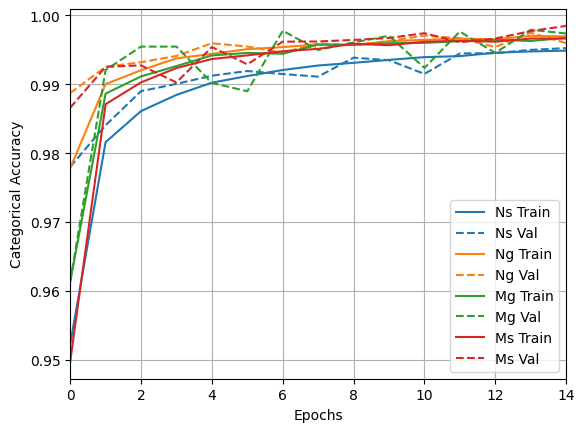

In [28]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'categorical_accuracy')
plotter.plot(model_history)


In [31]:
NS.save('Models Projeto A/NS')
NG.save('Models Projeto A/NG')
MG.save('Models Projeto A/MG')
MS.save('Models Projeto A/MS')

INFO:tensorflow:Assets written to: Models Projeto A/NS\assets
INFO:tensorflow:Assets written to: Models Projeto A/NG\assets
INFO:tensorflow:Assets written to: Models Projeto A/MG\assets
INFO:tensorflow:Assets written to: Models Projeto A/MS\assets
